Import libaries

In [1]:
import requests
import lxml.html as lh
import pandas as pd

In [2]:
WHO_url = 'https://github.com/mkumakech/Covid-19_Pandemic/blob/master/europe_covid19.csv' #assign the wiki page
#WHO_url = 'https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases'

page = requests.get(WHO_url) # create a handle to for contents of the wiki page

doc = lh.fromstring(page.content) # store content of the wiki page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 rows

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]

<b> 
Check the table headers</b>

In [3]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:
2:Name
3:WHO Region
4:Cases _cumulative total
5:Cases _cumulative total per 1 million population
6:Cases _newly reported in last 7 days
7:Cases _newly reported in last 24 hours
8:Deaths _cumulative total
9:Deaths_ cumulative total per 1 million population
10:Deaths _newly reported in last 7 days
11:Deaths _newly reported in last 24 hours
12:Transmission Classification


In [4]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=12: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

In [5]:
[len(C) for (title,C) in col]

[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62]

In [6]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [7]:
df.head()

,,Name,WHO Region,Cases _cumulative total,Cases _cumulative total per 1 million population,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total,Deaths_ cumulative total per 1 million population,Deaths _newly reported in last 7 days,Deaths _newly reported in last 24 hours,Transmission Classification
0,,Russian Federation,Europe,3655839,25051.24,160023,21887,67832,464.81,3892,612,Clusters of cases
1,,The United Kingdom,Europe,3505758,51641.83,294178,38905,93290,1374.22,8523,1820,Community transmission
2,,France,Europe,2916577,44682.4,132669,26565,71261,1091.73,2613,310,Community transmission
3,,Italy,Europe,2414166,39928.76,95130,13568,83681,1384.03,3355,524,Clusters of cases
4,,Spain,Europe,2412318,51595.11,184705,18500,54637,1168.59,1146,80,Community transmission


In [8]:
df.tail()

,,Name,WHO Region,Cases _cumulative total,Cases _cumulative total per 1 million population,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total,Deaths_ cumulative total per 1 million population,Deaths _newly reported in last 7 days,Deaths _newly reported in last 24 hours,Transmission Classification
57,,Isle of Man,Europe,432,5080.44,26,0,25,294.01,0,0,No cases
58,,Guernsey,Europe,309,4889.55,2,0,13,205.71,0,0,Community transmission
59,,Greenland,Europe,30,528.43,1,0,0,0,0,0,No cases
60,,Holy See,Europe,26,32138.44,0,0,0,0,0,0,Sporadic cases
61,,Turkmenistan,Europe,0,0,0,0,0,0,0,0,No cases


In [9]:
df.shape

(62, 12)

<b> Data Analysis</b>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [11]:
%%capture
! pip install seaborn

In [12]:
df['Transmission Classification'].value_counts().to_frame()

,Transmission Classification
Community transmission,38
Clusters of cases,16
Sporadic cases,4
No cases,3
Pending,1


<b>Feature before One Hot Encoding</b>

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [14]:
df[['Deaths _cumulative total','Cases _cumulative total','Cases _newly reported in last 7 days','Cases _newly reported in last 24 hours', 'Transmission Classification']].head()

,Deaths _cumulative total,Cases _cumulative total,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Transmission Classification
0,67832,3655839,160023,21887,Clusters of cases
1,93290,3505758,294178,38905,Community transmission
2,71261,2916577,132669,26565,Community transmission
3,83681,2414166,95130,13568,Clusters of cases
4,54637,2412318,184705,18500,Community transmission



Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame

In [15]:
Feature = df[['Cases _cumulative total','Deaths _cumulative total']]
Feature = pd.concat([Feature,pd.get_dummies(df['Transmission Classification'])], axis=1)
Feature.drop(['No cases'], axis = 1,inplace=True)
Feature.drop(['Pending'], axis = 1,inplace=True)
#Feature.drop(['Not applicable'], axis = 1,inplace=True)
Feature.head()

,Cases _cumulative total,Deaths _cumulative total,Clusters of cases,Community transmission,Sporadic cases
0,3655839,67832,1,0,0
1,3505758,93290,0,1,0
2,2916577,71261,0,1,0
3,2414166,83681,1,0,0
4,2412318,54637,0,1,0


<h2> Feature selection</h2>

Lets defind feature sets, X:

In [16]:
X = Feature
X[0:5]

,Cases _cumulative total,Deaths _cumulative total,Clusters of cases,Community transmission,Sporadic cases
0,3655839,67832,1,0,0
1,3505758,93290,0,1,0
2,2916577,71261,0,1,0
3,2414166,83681,1,0,0
4,2412318,54637,0,1,0


<b>What are our lables?</b>

In [17]:
y = df['Transmission Classification'].values
y[0:5]

array(['Clusters of cases', 'Community transmission',
       'Community transmission', 'Clusters of cases',
       'Community transmission'], dtype=object)

In [18]:
y_collection = df['Transmission Classification'].replace(to_replace=['Community transmission', 'Clusters of cases','Sporadic cases'], value=[2,1,0]).values
y_collection[0:5]

array([1, 2, 2, 1, 2], dtype=object)


<h2> 
Normalize Data</h2>

Data Standardization give data zero mean and unit variance (technically should be done after train test split

In [19]:
from sklearn.preprocessing import StandardScaler
X_initial = X
scaler = preprocessing.StandardScaler().fit(X_initial)
X= scaler.transform(X)
X[0:10]

array([[ 3.68799811,  2.70179488,  1.6955825 , -1.25830574, -0.26261287],
       [ 3.51222662,  3.9147088 , -0.58976782,  0.79471941, -0.26261287],
       [ 2.8221911 ,  2.86516521, -0.58976782,  0.79471941, -0.26261287],
       [ 2.23377865,  3.45690026,  1.6955825 , -1.25830574, -0.26261287],
       [ 2.23161431,  2.07313595, -0.58976782,  0.79471941, -0.26261287],
       [ 1.85224885,  1.84187331, -0.58976782,  0.79471941, -0.26261287],
       [ 1.27073346,  0.63667768, -0.58976782,  0.79471941, -0.26261287],
       [ 1.11365162,  1.11664055, -0.58976782,  0.79471941, -0.26261287],
       [ 0.78556499,  0.49431823, -0.58976782,  0.79471941, -0.26261287],
       [ 0.49217215,  0.10120987, -0.58976782,  0.79471941, -0.26261287]])

<b> Import libraries</b>

In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [22]:
!pip install six

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [23]:
!pip install pydotplus

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 278 kB 31.7 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=f5796e161a2a53d0f68d4891a8a0b5c636519a93a38d78006902003ebd2726aa
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [24]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO

In [26]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

<b> 
Build an empty DecisionTree object with depth 5</b>

In [27]:
CovidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
CovidTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 3.68799811,  2.70179488,  1.6955825 , -1.25830574, -0.26261287],
       [ 3.51222662,  3.9147088 , -0.58976782,  0.79471941, -0.26261287],
       [ 2.8221911 ,  2.86516521, -0.58976782,  0.79471941, -0.26261287],
       [ 2.23377865,  3.45690026,  1.6955825 , -1.25830574, -0.26261287],
       [ 2.23161431,  2.07313595, -0.58976782,  0.79471941, -0.26261287]])

<b> Train the decision tree using the global X data set.</b>

In [29]:
CovidTree.fit(X_initial, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

<b> Print the Decision Tree</b>

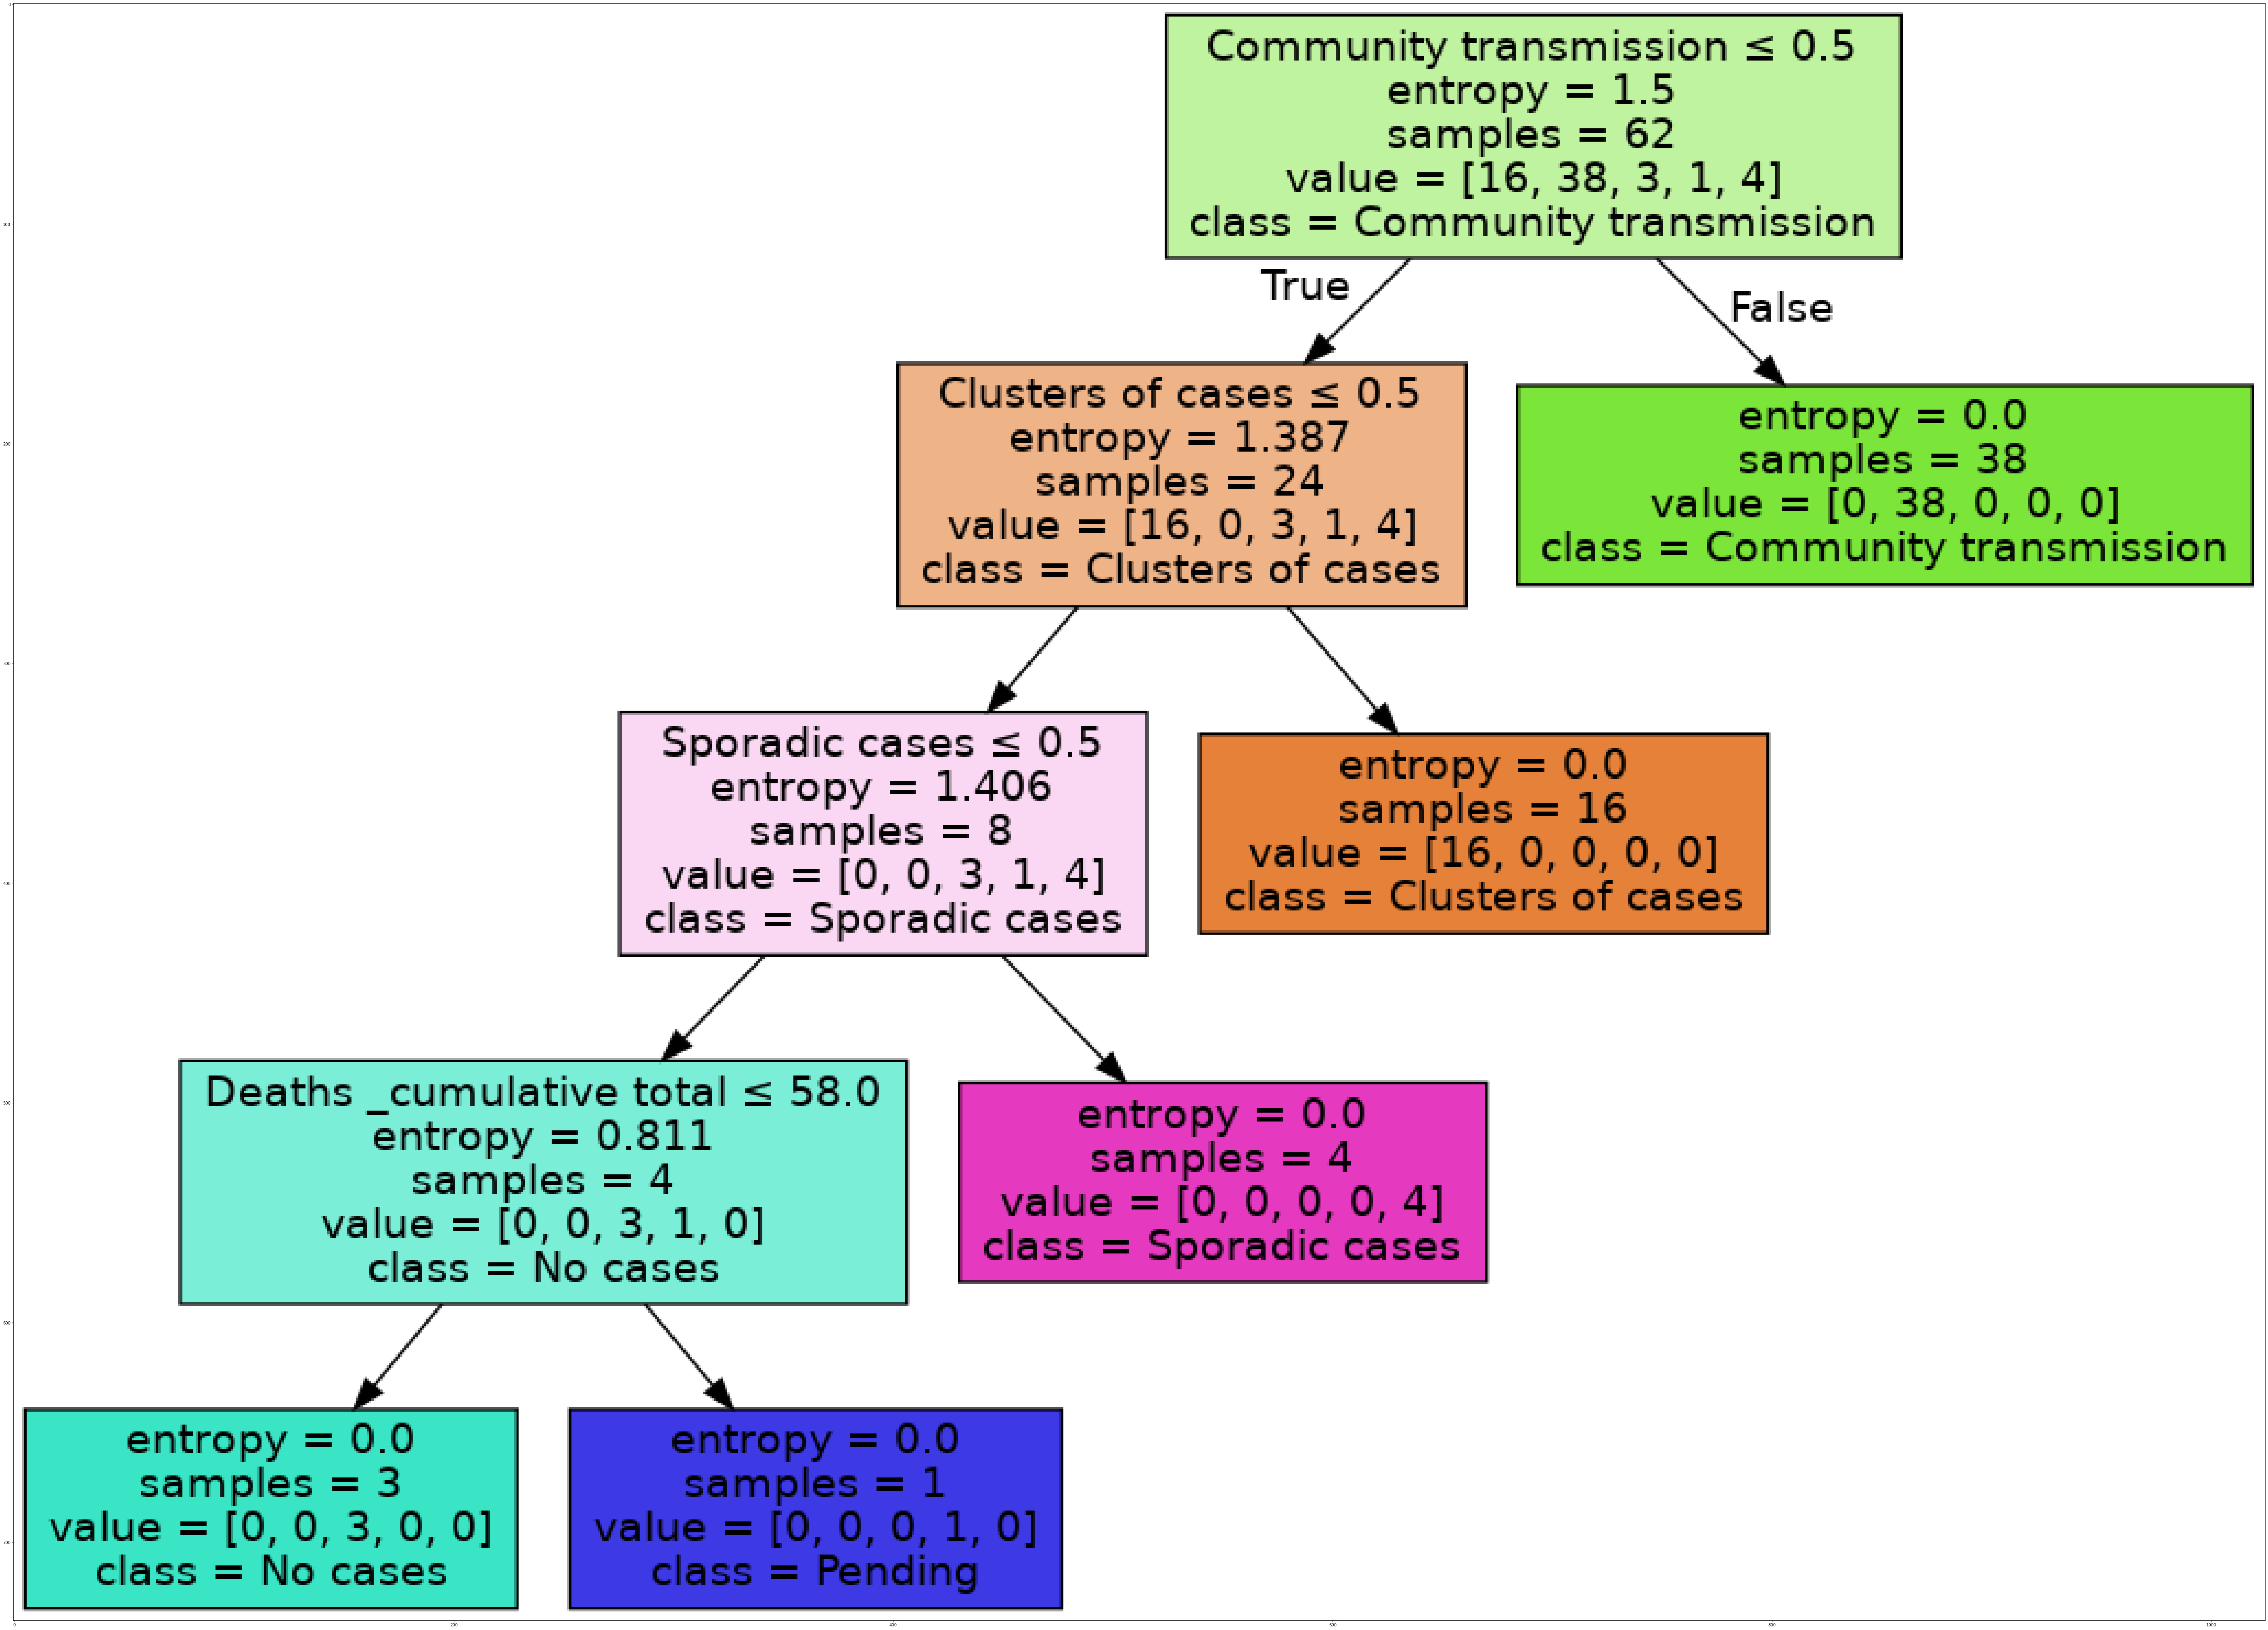

In [31]:
dot_data = StringIO()
filename = "TCtree.png"
featureNames = Feature.columns
targetNames = df['Transmission Classification'].tolist()
out=tree.export_graphviz(CovidTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [32]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')

<h2> Evaluating the Accuracy of Decison Tree Algorithm</h2>

Use Decision Tree object previously trained.

In [33]:
yhat_tree=CovidTree.predict(X_initial)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  1.0  F1 is 1.0
                        precision    recall  f1-score   support

     Clusters of cases       1.00      1.00      1.00        16
Community transmission       1.00      1.00      1.00        38
              No cases       1.00      1.00      1.00         3
               Pending       1.00      1.00      1.00         1
        Sporadic cases       1.00      1.00      1.00         4

              accuracy                           1.00        62
             macro avg       1.00      1.00      1.00        62
          weighted avg       1.00      1.00      1.00        62



array([[16,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  4]])

<h2> REMARKS</h2>

<b>The  Accuracy is  1.0 and  F1 is 1.0 </b>::indicating that the community Transmission mode is the most significance and dangerous modes of transmission of Covid-19 which reqiuire nterventions from government, Health authorities and every bodies.